## Dataset preparação


In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.metrics import (ConfusionMatrixDisplay, PrecisionRecallDisplay,
                             RocCurveDisplay, accuracy_score,
                             classification_report, confusion_matrix)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [121]:
def Ler_aba(drive_adress,index_aba=0):
  """ Recebe o endereço no drive da planilha excel e o index 
  da aba específica (Primeira aba de Default) e retona o dataframe padrão"""
  
  df=pd.read_excel(drive_adress,sheet_name=index_aba) 

  return df

In [122]:
df = Ler_aba('data/nova_intermediaria_nano.xlsx',0) 

In [123]:
df.columns

Index(['DOI', 'Volume (mL)', 'Total Volume (%)', 'Weight TiO2 (g)', 'mol TiO2',
       '% TiO2', '[TiO2] (g/mL)', 'Proportion TiO2/NaOH',
       'Normalize Proportion TiO2/NaOH', 'mol NaOH', 'Vol NaOH', '[NaOH]',
       'Temperature (C)', 'Time (h)', 'Washed', 'Washed Time',
       'Dried Temperature ©', 'Dried Time (h)', 'Calcinate Temperature',
       'Calcinate Time', 'Morphology', 'Size (nm)'],
      dtype='object')

In [124]:
df[df['Size (nm)'] == 10000]

,DOI,Volume (mL),Total Volume (%),Weight TiO2 (g),mol TiO2,% TiO2,[TiO2] (g/mL),Proportion TiO2/NaOH,Normalize Proportion TiO2/NaOH,mol NaOH,...,Temperature (C),Time (h),Washed,Washed Time,Dried Temperature ©,Dried Time (h),Calcinate Temperature,Calcinate Time,Morphology,Size (nm)
77,10.1002/zaac.200801322,x,NaN,0.2,0.002504,0.00626,0.02,0.000063,#NUM!,40,...,220.0,48.0,Water,NaN,NaN,NaN,25.0,NaN,Flower,10000.0
78,10.1002/zaac.200801322,x,NaN,0.2,0.002504,0.012519,0.02,0.000125,#NUM!,20,...,220.0,48.0,Water,NaN,NaN,NaN,25.0,NaN,Urchin,10000.0


In [125]:
df = df.drop(df[df['Size (nm)'] == 10000].index,inplace=False) #limpando enormes


In [126]:
df.tail(10)

,DOI,Volume (mL),Total Volume (%),Weight TiO2 (g),mol TiO2,% TiO2,[TiO2] (g/mL),Proportion TiO2/NaOH,Normalize Proportion TiO2/NaOH,mol NaOH,...,Temperature (C),Time (h),Washed,Washed Time,Dried Temperature ©,Dried Time (h),Calcinate Temperature,Calcinate Time,Morphology,Size (nm)
117,10.1016/j.heliyon.2017.e00456,NaN,NaN,0.30,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,110.0,72.0,0.1 HCl,3.0,80.0,24.0,NaN,2.0,Tube,NaN
118,10.1016/j.molcata.2006.01.003,200.0,NaN,1.50,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,150.0,48.0,0.1 HCl,NaN,80.0,8.0,NaN,2.0,Tube,NaN
119,10.1021/jp047113f,x,NaN,8.00,0.100168,0.043532,0.347826,0.000436,#NUM!,230,...,150.0,72.0,0.1 HCl,0.1,NaN,NaN,25.0,NaN,Tube,8-15
120,10.1088/0957-4484/16/9/086,200.0,NaN,3.00,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,120.0,30.0,NaN,2.0,110.0,NaN,1000.0,NaN,NaN,NaN
121,10.1021/jp104044j,NaN,NaN,0.25,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,150.0,12.0,0.1 HCl,NaN,70.0,20.0,600.0,2.0,Tube,10-7
122,10.1021/am2008568,NaN,NaN,0.50,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,200.0,24.0,0.1 HCl,NaN,-57.0,NaN,NaN,2.0,Belt,10-100
123,10.1088/0957-4484/19/27/275604,NaN,NaN,3.00,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,100.0,48.0,0.1 HCl,0.5,12.0,NaN,NaN,NaN,Tube,10
124,10.1557/jmr.2004.19.2.417,NaN,NaN,2.00,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,180.0,30.0,0.1 HCl,NaN,NaN,NaN,500.0,5.0,Tube,8-10
125,10.1016/j.cattod.2007.10.015,NaN,NaN,NaN,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,150.0,48.0,0.1 HCl,NaN,NaN,NaN,NaN,2.0,Tube,6-10
126,10.1016/j.jallcom.2009.10.030,NaN,NaN,NaN,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,110.0,24.0,0.1 HCl,1.0,100.0,NaN,25.0,2.0,Rod,50


In [127]:
df = df.reset_index(drop=True)
df = df.reindex([i for i in range(df.index.shape[0])])

In [128]:
df.tail(10)

,DOI,Volume (mL),Total Volume (%),Weight TiO2 (g),mol TiO2,% TiO2,[TiO2] (g/mL),Proportion TiO2/NaOH,Normalize Proportion TiO2/NaOH,mol NaOH,...,Temperature (C),Time (h),Washed,Washed Time,Dried Temperature ©,Dried Time (h),Calcinate Temperature,Calcinate Time,Morphology,Size (nm)
115,10.1016/j.heliyon.2017.e00456,NaN,NaN,0.30,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,110.0,72.0,0.1 HCl,3.0,80.0,24.0,NaN,2.0,Tube,NaN
116,10.1016/j.molcata.2006.01.003,200.0,NaN,1.50,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,150.0,48.0,0.1 HCl,NaN,80.0,8.0,NaN,2.0,Tube,NaN
117,10.1021/jp047113f,x,NaN,8.00,0.100168,0.043532,0.347826,0.000436,#NUM!,230,...,150.0,72.0,0.1 HCl,0.1,NaN,NaN,25.0,NaN,Tube,8-15
118,10.1088/0957-4484/16/9/086,200.0,NaN,3.00,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,120.0,30.0,NaN,2.0,110.0,NaN,1000.0,NaN,NaN,NaN
119,10.1021/jp104044j,NaN,NaN,0.25,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,150.0,12.0,0.1 HCl,NaN,70.0,20.0,600.0,2.0,Tube,10-7
120,10.1021/am2008568,NaN,NaN,0.50,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,200.0,24.0,0.1 HCl,NaN,-57.0,NaN,NaN,2.0,Belt,10-100
121,10.1088/0957-4484/19/27/275604,NaN,NaN,3.00,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,100.0,48.0,0.1 HCl,0.5,12.0,NaN,NaN,NaN,Tube,10
122,10.1557/jmr.2004.19.2.417,NaN,NaN,2.00,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,180.0,30.0,0.1 HCl,NaN,NaN,NaN,500.0,5.0,Tube,8-10
123,10.1016/j.cattod.2007.10.015,NaN,NaN,NaN,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,150.0,48.0,0.1 HCl,NaN,NaN,NaN,NaN,2.0,Tube,6-10
124,10.1016/j.jallcom.2009.10.030,NaN,NaN,NaN,#ERROR!,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,...,110.0,24.0,0.1 HCl,1.0,100.0,NaN,25.0,2.0,Rod,50


In [129]:
print(df['Size (nm)'][90:100])

90      10.0
91    50-120
92    50-300
93      20.0
94     20-30
95        10
96      75.0
97      30.0
98     14-15
99     10-30
Name: Size (nm), dtype: object


In [130]:
df = df.drop(['Proportion TiO2/NaOH','Normalize Proportion TiO2/NaOH','DOI','Volume (mL)','Total Volume (%)','Weight TiO2 (g)','% TiO2','[TiO2] (g/mL)'],axis=1)#						


In [131]:
df.columns

Index(['mol TiO2', 'mol NaOH', 'Vol NaOH', '[NaOH]', 'Temperature (C)',
       'Time (h)', 'Washed', 'Washed Time', 'Dried Temperature ©',
       'Dried Time (h)', 'Calcinate Temperature', 'Calcinate Time',
       'Morphology', 'Size (nm)'],
      dtype='object')

In [132]:
df.columns = ['n_TiO2','mol_NaOH','V_NaOH','[NaOH]','T','t','what_washed','washed_time','dried_T','dried_t','calcinate_T','calcinate_t','morpho','size(nm)']

In [133]:
df.head()

,n_TiO2,mol_NaOH,V_NaOH,[NaOH],T,t,what_washed,washed_time,dried_T,dried_t,calcinate_T,calcinate_t,morpho,size(nm)
0,NaN,900,90.0,10.0,130.0,120.0,0.1 HCl,NaN,50.0,3.0,25.0,NaN,Tube,40-70
1,0.002504,NaN,NaN,8.0,240.0,2.0,Water,NaN,NaN,NaN,25.0,NaN,Tube,9
2,0.002504,NaN,NaN,8.0,240.0,3.0,Water,NaN,NaN,NaN,25.0,NaN,Wire,50-300
3,0.00626,NaN,NaN,10.0,220.0,20.0,0.1 HCl,NaN,NaN,NaN,25.0,NaN,Belt,60.0
4,0.00626,NaN,NaN,7.5,160.0,20.0,0.1 HCl,NaN,NaN,NaN,25.0,NaN,Tube,10.0


Ideias : Desmembrar 'size(nm)' em colunas representando componentes de interesse, como média , desvio padrão, variância, etc. Assim podemos quantificar os dads da coluna.

## Exploração

In [134]:

df.apply(pd.isnull).sum()/df.shape[0]

n_TiO2         0.168
mol_NaOH       0.280
V_NaOH         0.296
[NaOH]         0.008
T              0.000
t              0.008
what_washed    0.016
washed_time    0.760
dried_T        0.408
dried_t        0.592
calcinate_T    0.064
calcinate_t    0.544
morpho         0.008
size(nm)       0.024
dtype: float64

In [135]:
df.dtypes

n_TiO2          object
mol_NaOH        object
V_NaOH         float64
[NaOH]         float64
T              float64
t              float64
what_washed     object
washed_time    float64
dried_T        float64
dried_t        float64
calcinate_T    float64
calcinate_t    float64
morpho          object
size(nm)        object
dtype: object

### Adequando prop_TiO2/NaOH: ??

In [136]:
for i in ['n_TiO2','mol_NaOH']:
    df[i] = df[i].map(lambda x: str(x).replace(",","."))
    df[i] = df[i].map(lambda x: None if x == '#ERROR!' or x == 'nan' else x)
    df[i] = pd.to_numeric(df[i])
    mean = np.mean(df[i].dropna())
    df[i] = df[i].fillna(mean)

df['prop_TiO2/NaOH'] = df['n_TiO2']/df['mol_NaOH']


In [137]:

df['prop_TiO2/NaOH']

0      0.000038
1      0.000003
2      0.000003
3      0.000007
4      0.000007
         ...   
120    0.000038
121    0.000038
122    0.000038
123    0.000038
124    0.000038
Name: prop_TiO2/NaOH, Length: 125, dtype: float64

### Adequando size(nm):

In [138]:
df = df.dropna(subset=['size(nm)'])


In [140]:
df = df.reindex(columns = df.columns.tolist() + ["size_mean","size_std"])
df = df.reindex([i for i in range(df.index.shape[0])])

In [142]:
df.tail(10)

,n_TiO2,mol_NaOH,V_NaOH,[NaOH],T,t,what_washed,washed_time,dried_T,dried_t,calcinate_T,calcinate_t,morpho,size(nm),prop_TiO2/NaOH,size_mean,size_std
112,0.034201,891.25,50.0,10.0,150.0,72.0,HCl,24.0,NaN,NaN,NaN,2.0,Wire,25-30,0.000038,NaN,NaN
113,0.075126,420.00,28.0,15.0,150.0,72.0,0.05 HCl,NaN,NaN,NaN,400.0,5.0,Tube,10-20,0.000179,NaN,NaN
114,0.075126,420.00,28.0,15.0,150.0,72.0,0.05 HCl,NaN,NaN,NaN,400.0,5.0,Tube,10.0,0.000179,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,0.100168,230.00,23.0,10.0,150.0,72.0,0.1 HCl,0.1,NaN,NaN,25.0,NaN,Tube,8-15,0.000436,NaN,NaN
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,0.034201,891.25,20.0,10.0,150.0,12.0,0.1 HCl,NaN,70.0,20.0,600.0,2.0,Tube,10-7,0.000038,NaN,NaN
120,0.034201,891.25,20.0,10.0,200.0,24.0,0.1 HCl,NaN,-57.0,NaN,NaN,2.0,Belt,10-100,0.000038,NaN,NaN
121,0.034201,891.25,49.0,10.0,100.0,48.0,0.1 HCl,0.5,12.0,NaN,NaN,NaN,Tube,10,0.000038,NaN,NaN


In [143]:
#TENTATIVA IDEAL. FALHA...
#df['size_mean']= np.where('-' in df['size(nm)'],np.mean(float(df['size(nm)'].str.split('-')[0]+df['size(nm)'].str.split('-')[1])),float(df['size(nm)']))
#df['size_std']= np.where('-' in df['size(nm)'],np.std(float(df['size(nm)'].str.split('-')[0]+df['size(nm)'].str.split('-')[1])),float(0))

# Limpe tudo com .select_dtypes(include='object') depois...

for i in range(df['size(nm)'].shape[0]):
 
  print(df['size(nm)'][i])
  
  try:

    if type(df['size(nm)'][i]) == str:
      df['size_mean'][i] = np.mean([float(df['size(nm)'][i].split('-')[0]),float(df['size(nm)'][i].split('-')[1])])
      df['size_std'][i] = np.std([float(df['size(nm)'][i].split('-')[0]),float(df['size(nm)'][i].split('-')[1])])

    else:
      df['size_mean'][i] = df['size(nm)'][i]
      df['size_std'][i] = 0

  except:
    df['size_mean'][i] = float(df['size(nm)'][i])
    df['size_std'][i] = 0



40-70


C:\Users\015025631\AppData\Local\Temp\ipykernel_49048\3442646530.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_mean'][i] = np.mean([float(df['size(nm)'][i].split('-')[0]),float(df['size(nm)'][i].split('-')[1])])
C:\Users\015025631\AppData\Local\Temp\ipykernel_49048\3442646530.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_std'][i] = np.std([float(df['size(nm)'][i].split('-')[0]),float(df['size(nm)'][i].split('-')[1])])
C:\Users\015025631\AppData\Local\Temp\ipykernel_49048\3442646530.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

9


C:\Users\015025631\AppData\Local\Temp\ipykernel_49048\3442646530.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_std'][i] = 0


50-300
60.0


C:\Users\015025631\AppData\Local\Temp\ipykernel_49048\3442646530.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_mean'][i] = df['size(nm)'][i]
C:\Users\015025631\AppData\Local\Temp\ipykernel_49048\3442646530.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_std'][i] = 0


10.0
40-300
80.0
9.0
25.0
100-300
8-12
8-10
35-165
300-500
20-40
20-320
8-22
90.0
40-120
7-11
10.0
8-12
5-8
7.0
20.0
10.0
10.0
8-15
8-11
10.0
20-40
20-40
20-40
50-100
20-100
10.0
20.0
10
10.0
65-400
20-50
200-400
20-50
20-50
50-200
10-15
8-14
7-12
9
8-20
20-100
10.0
10-20
50-70
50-100
10-15
9.0
10.0
50.0
30-50
10.0
8-10
10.0
5-30
5-10
50-400
60-300
100.0
15.0
100.0
50.0
15.0
10-70
10.0
60.0
7-11
20-90
10
50.0
120
10.0
10.0
10
7-10
50.0
7-10
20.0
9.0
20-50
50-300
10.0
50-120
50-300
20.0
20-30
10
75.0
30.0
14-15
10-30
4-10
8-20
120.0
20.0
10-50
8
10.0
11.0
5-8
20.0
10-12
20-40
25-30
10-20
10.0
nan
nan
8-15
nan
10-7
10-100
10


In [ ]:
#df['size(nm)'].str.split('-').apply(lambda x: x[0]+x[1])
#ideia

## Análise

In [144]:
#Normalizando:
def Normalizar(df):
  print('Normalizando ...')
  for i in df.columns:
    try:
      df[i] = df[i] / df[i].max(axis=0)
    except:
      print('Falha:',i,type(i))
  return df

In [145]:
df = Normalizar(df)

Normalizando ...
Falha: what_washed <class 'str'>
Falha: morpho <class 'str'>
Falha: size(nm) <class 'str'>


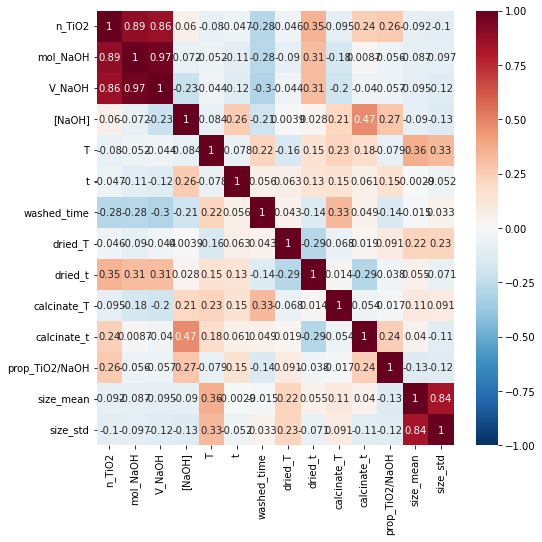

In [146]:
correlation = df.corr()
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Usar n_Naoh e n_TiO2 (Fração molar), [NaOH], V_NaOH se torna inutil porque a informação depende da pressão usada

morpho
Belt      AxesSubplot(0.125,0.125;0.775x0.755)
Rod       AxesSubplot(0.125,0.125;0.775x0.755)
Sphere    AxesSubplot(0.125,0.125;0.775x0.755)
Tube      AxesSubplot(0.125,0.125;0.775x0.755)
Wire      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

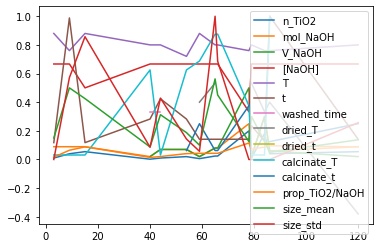

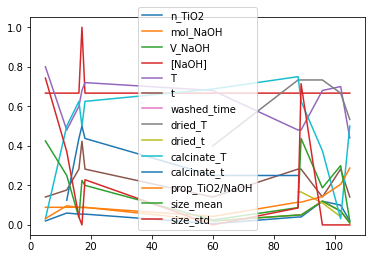

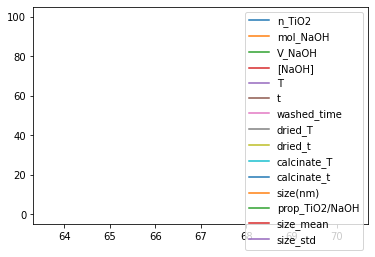

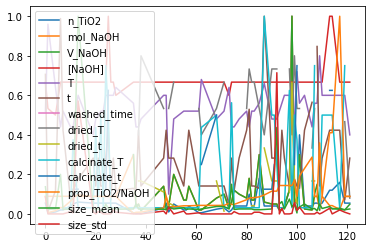

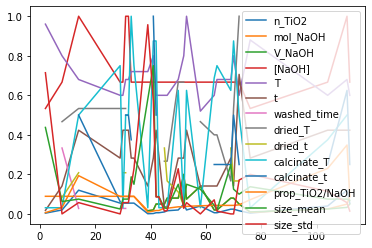

In [147]:
df.groupby(df['morpho']).plot()

In [148]:
import plotly.express as px

fig = px.line(df, x=df.index, y=['prop_TiO2/NaOH','V_NaOH','size_std'])
fig.show()


In [149]:
df.dtypes

n_TiO2            float64
mol_NaOH          float64
V_NaOH            float64
[NaOH]            float64
T                 float64
t                 float64
what_washed        object
washed_time       float64
dried_T           float64
dried_t           float64
calcinate_T       float64
calcinate_t       float64
morpho             object
size(nm)           object
prop_TiO2/NaOH    float64
size_mean         float64
size_std          float64
dtype: object

# Para análise quantitativa: Tamanho

## Tratando Nulos

In [150]:
df.apply(pd.isnull).sum()/df.shape[0]

n_TiO2            0.024590
mol_NaOH          0.024590
V_NaOH            0.311475
[NaOH]            0.024590
T                 0.024590
t                 0.032787
what_washed       0.032787
washed_time       0.778689
dried_T           0.426230
dried_t           0.598361
calcinate_T       0.065574
calcinate_t       0.573770
morpho            0.024590
size(nm)          0.024590
prop_TiO2/NaOH    0.024590
size_mean         0.024590
size_std          0.000000
dtype: float64

In [181]:
df = df.dropna(subset=['prop_TiO2/NaOH','T','t','size_mean'])

usando apenas colunas sem nulos

In [183]:

df2 = df[['prop_TiO2/NaOH','T','t','size_mean']] # sem os percentuais de titânio!
df2

,prop_TiO2/NaOH,T,t,size_mean
0,0.087255,0.52,0.705882,0.13750
1,0.006452,0.96,0.011765,0.02250
2,0.006452,0.96,0.017647,0.43750
3,0.016129,0.88,0.117647,0.15000
4,0.016129,0.64,0.117647,0.02500
...,...,...,...,...
114,0.410714,0.60,0.423529,0.02500
117,1.000000,0.60,0.423529,0.02875
119,0.088112,0.60,0.070588,0.02125
120,0.088112,0.80,0.141176,0.13750


## Preparando modelo

In [184]:
import plotly.express as px

fig = px.bar(df, x=df.index, y='size_mean')
fig.show()

In [185]:

#x=pd.DataFrame(df2.iloc[:, 0:-1].values,columns=['[NaOH]','T','t','calcinate_T'])
x=df2.iloc[:, 0:-1].values

In [186]:

#y = pd.DataFrame(df2.iloc[:,-1].values,columns=['size_mean'])
y = df2.iloc[:,-1].values

In [187]:
from sklearn.model_selection import train_test_split #classe
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0) # objeto

In [188]:
print(x_test.shape,x_train.shape)

(24, 3) (94, 3)


In [189]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
#--------------------------------------------------
regressorRF = RandomForestRegressor(n_estimators = 11,random_state = 42) 
regressorRF.fit(x_train, y_train)
#---------------------------------------------------
regressorRi = Ridge(alpha=.1)
regressorRi.fit(x_train, y_train)

Ridge(alpha=0.1)

In [190]:
previsao1 = regressorRF.predict(x_test)
previsao2 = regressorRi.predict(x_test)

## Analisando **performance**

In [191]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, previsao1))
print(mean_squared_error(y_test, previsao2))

0.016129165380276485
0.013257776873945923


In [192]:
y_test

array([0.05   , 0.02125, 0.0625 , 0.0625 , 0.4375 , 0.01625, 0.0225 ,
       0.025  , 0.03125, 0.0375 , 0.1875 , 0.075  , 0.4375 , 0.025  ,
       0.025  , 0.025  , 0.075  , 0.0875 , 0.125  , 0.0225 , 0.025  ,
       0.3    , 0.0375 , 0.05   ])

In [193]:
combined1 = np.concatenate((previsao1.reshape(len(previsao1),1), y_test.reshape(len(y_test),1)),1)

combined2 = np.concatenate((previsao2.reshape(len(previsao1),1), y_test.reshape(len(y_test),1)),1)
#combined.columns = ["actual", "predictions"]
compara1 = pd.DataFrame(combined1,columns=['pred','atual'])

compara2 = pd.DataFrame(combined2,columns=['pred','atual'])


<AxesSubplot:>

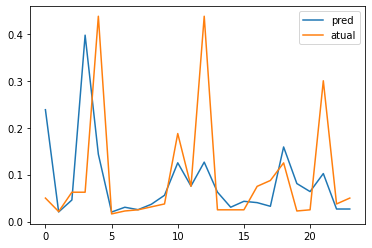

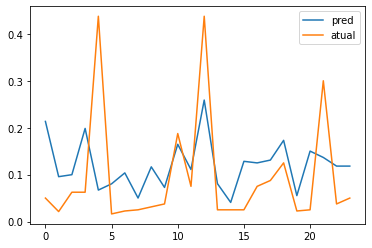

In [194]:
compara1.plot() #Random Forest
compara2.plot() #Ridge

In [196]:
import plotly.express as px

fig = px.line(compara2, x=compara2.index, y=['atual','pred'])
fig.show() 